<a href="https://colab.research.google.com/github/JoseLuisBarbaFarro/centro_comercial/blob/main/Copia_de_CelullarAutomaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import io
import random
from typing import Optional
 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import convolve2d
plt.style.use('bmh')

In [3]:
class Celula:
  def __init__(self):
    self.tinc = 0  
    self.timm = 0
    self.pmov = 1
    self.STA = 1
    self.INF = 2
    self.INC = 0
    self.IMM = 0

In [16]:
from scipy.signal.ltisys import LinearTimeInvariant
class Lattice:
  naturalBirthDay = 13
  naturalDeathRate = 7
  deathRateInf = 14.6
  cureRate = 64
  RateOfTreatment = 10
  RateOfTreatmentInIncubation = 2
  RateOfLosingImmunity = 90
  TIMEINCMAX = 8
  TIMEIMMMAX = 3
  listLIVE = []
  listBIRTH = []
  listNATURALDEATH = []
  listDEATHINF = []
  listINCUBATION = []
  listIMM = []
  listILL = []  
  listSupce = []
  listHeal = []
  listTraet = []
  listFigure = []
  sumLive = 0
  sumNaturalDeath = 0
  sumBirth = 0
  sumDeathInf = 0
  sumINC = 0
  sumILL = 0
  sumIMM  = 0
  sumSupc = 0
  sumHeal = 0
  sumTraet = 0
  B3 = 10
  B4 = 20
  B5 = 30
  size = 50
  arr = np.empty((size, size), Celula)
  
  def loadLattice(self):
    for i in range(0,Lattice.size):
      for j in range(0,Lattice.size):
        Lattice.arr[i,j] = Celula()
        Lattice.arr[i,j].STA = random.choices([0,1], weights = [5,5])[0]
        if(Lattice.arr[i,j].STA == 1):
          Lattice.arr[i,j].INF = random.choices([2,5], weights = [5,5])[0]
        
  
  def ILL(self,i,j):
    p = 0 #sentido horario
    if(i == 0) and (j==0):
      ill  = Lattice.arr[Lattice.size-1,j].INF + Lattice.arr[i,Lattice.size-1].INF + Lattice.arr[i,j + 1].INF + Lattice.arr[i+1,j].INF
    elif(i == 0) and (j!= 0):
      ill  = Lattice.arr[Lattice.size-1,j].INF + Lattice.arr[i,j-1].INF + Lattice.arr[i,j + 1].INF + Lattice.arr[i+1,j].INF
    elif(i == 0) and (j == Lattice.size-1):
      ill  = Lattice.arr[Lattice.size-1,j].INF + Lattice.arr[i,j-1].INF + Lattice.arr[i,0].INF + Lattice.arr[i+1,j].INF
    elif(i != 0) and (j == Lattice.size-1):
      ill  = Lattice.arr[i-1,j].INF + Lattice.arr[i,j-1].INF + Lattice.arr[i,0].INF + Lattice.arr[i+1,j].INF
    if(i == Lattice.size-1) and (j == Lattice.size-1):
      ill  = Lattice.arr[i-1,j].INF + Lattice.arr[i,j-1].INF + Lattice.arr[i,0].INF + Lattice.arr[0,j].INF
    if(i == Lattice.size-1) and (j != Lattice.size-1):
      ill  = Lattice.arr[i-1,j].INF + Lattice.arr[i,j-1].INF + Lattice.arr[i,j + 1].INF + Lattice.arr[0,j].INF
    if(i == Lattice.size-1) and (j == 0): 
      ill  = Lattice.arr[i-1,j].INF + Lattice.arr[i,Lattice.size-1].INF + Lattice.arr[i,j + 1].INF + Lattice.arr[0,j].INF
    if(i != 0) and (j==0):
      ill  = Lattice.arr[i-1,j].INF + Lattice.arr[i,Lattice.size-1].INF + Lattice.arr[i,j + 1].INF + Lattice.arr[i+1,j].INF
    else:
      ill  = Lattice.arr[i-1,j].INF + Lattice.arr[i,j-1].INF + Lattice.arr[i,j + 1].INF + Lattice.arr[i+1,j].INF
    if (16 < ill) and (ill <= 20):
      p = random.choices([0,1], weights = [100-Lattice.B5,Lattice.B5])[0]
    elif (12 < ill) and (ill <= 16):
      p = random.choices([0,1], weights = [100-Lattice.B4,Lattice.B4])[0]
    elif (8 < ill) and (ill <= 12):
      p = random.choices([0,1], weights = [100-Lattice.B3,Lattice.B3])[0]
    if(p == 1):
      Lattice.arr[i,j].INF = 3
      Lattice.arr[i,j].INC = 1 #empieza incubacion

  
  def rule2INCUBACION(self,i,j):
    if (Lattice.arr[i,j].INC == 1) and (Lattice.arr[i,j].INF == 3) and (Lattice.arr[i,j].STA == 1): #si el indiv. es susceptible y esta en periodo de incubacion
      if(Lattice.arr[i,j].tinc < Lattice.TIMEINCMAX):
        Lattice.arr[i,j].tinc += 1
      else:
        Lattice.arr[i,j].INC == 0
        Lattice.arr[i,j].INF = 5 #se vuelve un infectado
        Lattice.arr[i,j].tinc = 0 #se reinicia el tiempo de incubacion
  
  def rule3INMUNIDAD(self,i,j):
    if (Lattice.arr[i,j].IMM == 1) and (Lattice.arr[i,j].INF == 1) and (Lattice.arr[i,j].STA == 1): #si el indiv. esta sano y entra en periodo de inmunidad
      if(Lattice.arr[i,j].timm < Lattice.TIMEIMMMAX):
        Lattice.arr[i,j].timm += 1
      else:
        p = random.choices([0,1], weights = [100-Lattice.RateOfLosingImmunity,Lattice.RateOfLosingImmunity])[0]
        if(p == 1):
          Lattice.arr[i,j].IMM == 0
          Lattice.arr[i,j].INF = 2 #se vuelve susceptible
          Lattice.arr[i,j].timm  = 0 #se reinicia el tiempo de inmunidad
  
  def traetmentRule1(self,i,j):
    if(Lattice.arr[i,j].INF == 5) and (Lattice.arr[i,j].STA == 1):
      p = random.choices([0,1], weights = [100-Lattice.RateOfTreatment,Lattice.RateOfTreatment])[0]
      if(p == 1):
        Lattice.arr[i,j].INF =4 #periodo de tratamiento
  
  def traetmentRule2(self,i,j):      
    if(Lattice.arr[i,j].INF == 3) and (Lattice.arr[i,j].STA == 1):
      p = random.choices([0,1], weights = [100-Lattice.RateOfTreatmentInIncubation,Lattice.RateOfTreatmentInIncubation])[0]
      if(p == 1):
        Lattice.arr[i,j].INF = 4#periodo de tratamiento
        Lattice.arr[i,j].tinc = 0 #se reinicia el tiempo de incubacion
  
  def traetmentRule3(self,i,j):
    if(Lattice.arr[i,j].INF == 4) and (Lattice.arr[i,j].STA == 1):
      p = random.choices([0,1], weights = [100-Lattice.cureRate,Lattice.cureRate])[0]
      if(p == 1):
        Lattice.arr[i,j].INF = 1#individuo sano
  
  def birthRule(self,i,j):
    if(Lattice.arr[i,j].STA == 0):
      p = random.choices([0,1], weights = [100-Lattice.naturalBirthDay,Lattice.naturalBirthDay])[0]
      if(p == 1):
        Lattice.arr[i,j].tinc = 0  
        Lattice.arr[i,j].timm = 0
        Lattice.arr[i,j].pmov = 1
        Lattice.arr[i,j].STA = 1 #nacimiento
        Lattice.arr[i,j].INF = 2
        Lattice.arr[i,j].INC = 0
        Lattice.arr[i,j].IMM = 0      
        Lattice.sumBirth += 1
  
  def birthRule2(self,i,j):
    if(Lattice.arr[i,j].STA == 1):
      p = random.choices([0,1], weights = [100-Lattice.naturalDeathRate,Lattice.naturalDeathRate])[0]
      if(p == 1):
        Lattice.arr[i,j].tinc = 0  
        Lattice.arr[i,j].timm = 0
        Lattice.arr[i,j].pmov = 1 
        Lattice.arr[i,j].STA = 0 #muerte
        Lattice.arr[i,j].INF = 2
        Lattice.arr[i,j].INC = 0
        Lattice.arr[i,j].IMM = 0  
        Lattice.sumNaturalDeath += 1
  
  def birthRule3(self,i,j):        
    if(Lattice.arr[i,j].INF == 5) and (Lattice.arr[i,j].STA == 1):
      p = random.choices([0,1], weights = [100-Lattice.deathRateInf,Lattice.deathRateInf])[0]
      if(p == 1):
        Lattice.arr[i,j].tinc = 0  
        Lattice.arr[i,j].timm = 0
        Lattice.arr[i,j].pmov = 1 
        Lattice.arr[i,j].STA = 0 #muerte
        Lattice.arr[i,j].INF = 2
        Lattice.arr[i,j].INC = 0
        Lattice.arr[i,j].IMM = 0 
        Lattice.sumDeathInf += 1 
  
  def apply_parity_rule(self):
    Lattice.sumLive = 0
    Lattice.sumNaturalDeath = 0
    Lattice.sumBirth = 0
    Lattice.sumDeathInf = 0
    Lattice.sumINC = 0
    Lattice.sumILL = 0
    Lattice.sumIMM  = 0
    Lattice.sumSupc = 0
    Lattice.sumHeal = 0
    Lattice.sumTraet = 0
    for y in range (0, Lattice.size-1):
      for x in range(0, Lattice.size-1):
        if(Lattice.arr[x,y].STA == 1):
          Lattice.sumLive += 1
          self.ILL(x,y)
          self.rule2INCUBACION(x,y)
          self.rule3INMUNIDAD(x,y)
          self.traetmentRule1(x,y)
          self.traetmentRule2(x,y)
          self.traetmentRule3(x,y)
          self.birthRule2(x,y)
          self.birthRule3(x,y)
          #movimiento  
          if(Lattice.arr[x,y].INF == 1):
            Lattice.sumHeal += 1
            plt.scatter(x,y,c='red')
          if(Lattice.arr[x,y].INF == 2):
            Lattice.sumSupc += 1
            plt.scatter(x,y,c='blue')
          if(Lattice.arr[x,y].INF == 3):
            Lattice.sumINC += 1
            plt.scatter(x,y,c='green')
          if(Lattice.arr[x,y].INF == 4):
            Lattice.sumTraet += 1
            plt.scatter(x,y,c='pink')
          if(Lattice.arr[x,y].INF == 5):
            Lattice.sumILL += 1
            plt.scatter(x,y,c='black')
        else:
          self.birthRule(x,y)
    Lattice.listSupce.append(Lattice.sumSupc)
    Lattice.listLIVE.append(Lattice.sumLive)
    Lattice.listNATURALDEATH.append(Lattice.sumNaturalDeath)
    Lattice.listBIRTH.append(Lattice.sumBirth)
    Lattice.listDEATHINF.append(Lattice.sumDeathInf)
    Lattice.listINCUBATION.append(Lattice.sumINC)
    Lattice.listILL.append(Lattice.sumILL)
    Lattice.listIMM.append(Lattice.sumIMM)     
    Lattice.listHeal.append(Lattice.sumHeal)
    Lattice.listTraet.append(Lattice.sumTraet)
    Lattice.listFigure.append(plt.show())
    plt.clf()

In [ ]:
print(random.choices([0,1], weights = [3,7])[0])

0


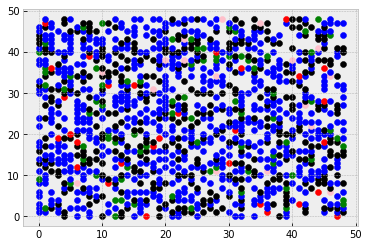

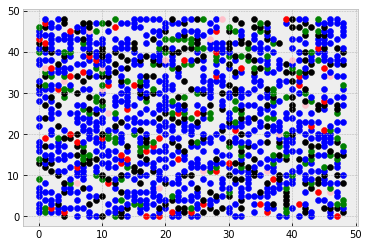

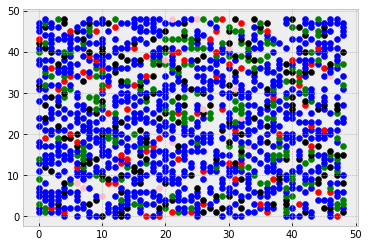

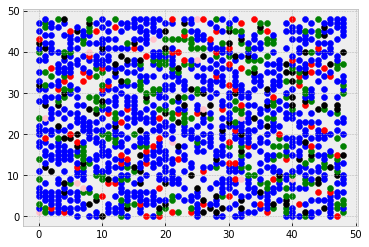

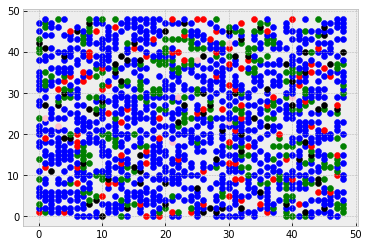

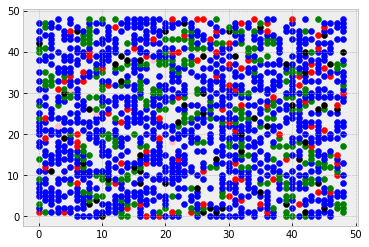

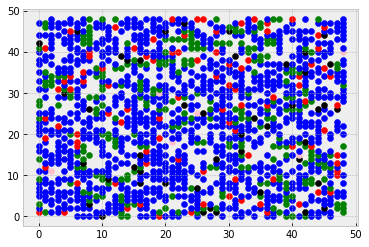

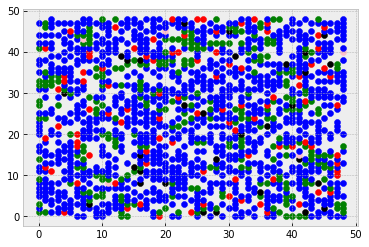

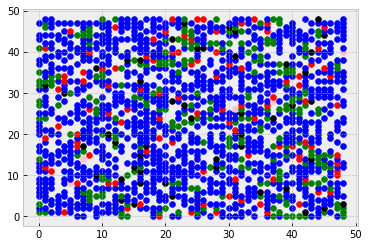

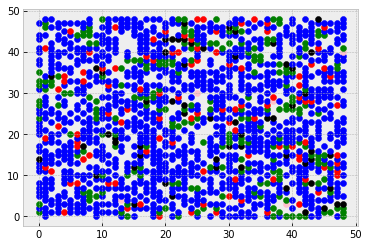

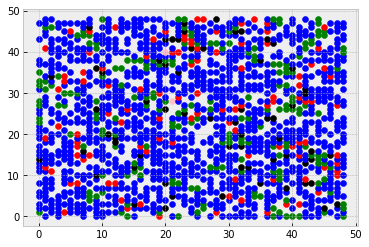

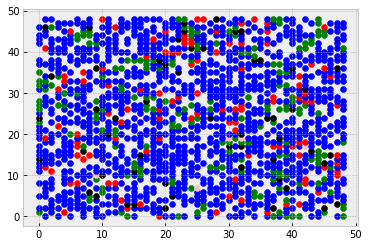

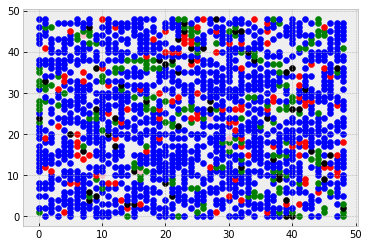

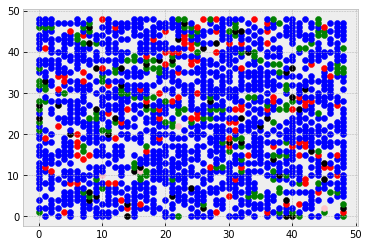

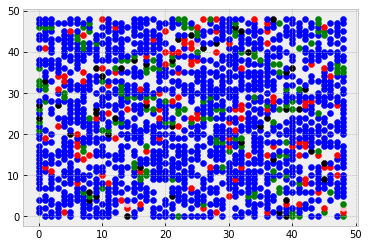

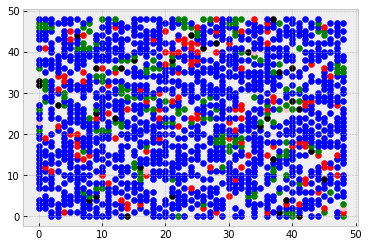

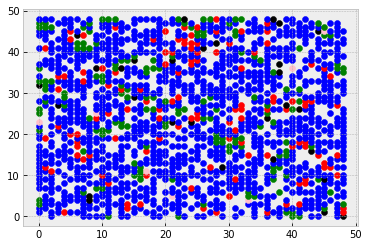

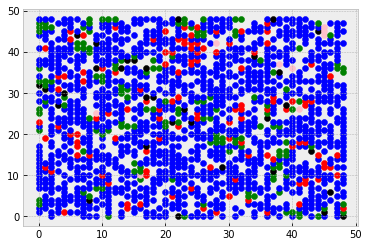

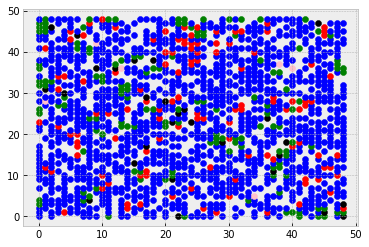

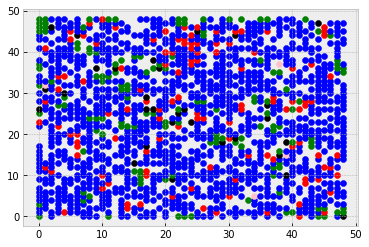

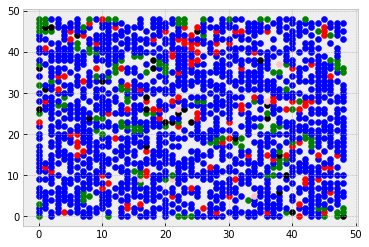

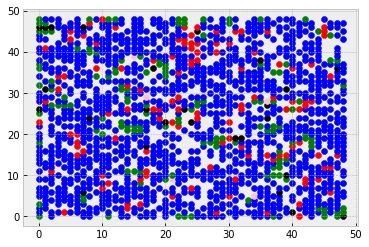

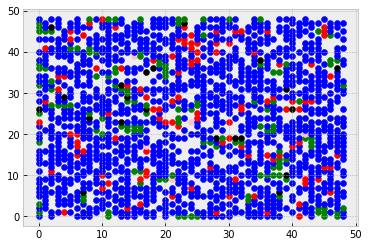

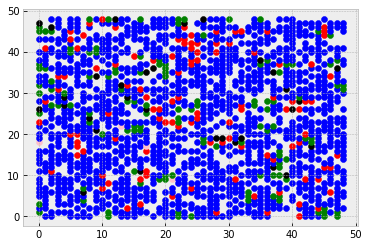

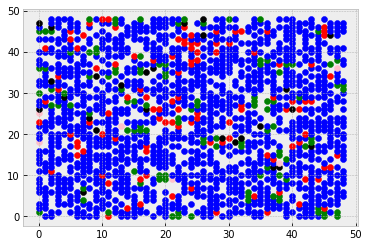

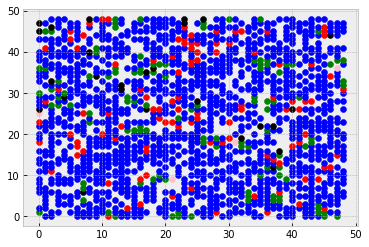

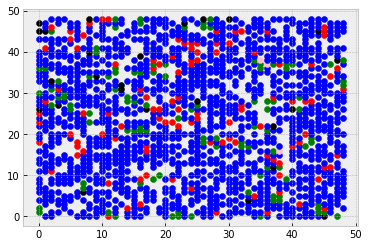

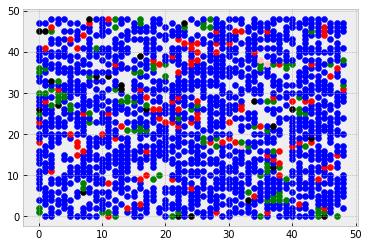

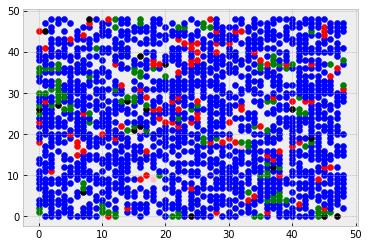

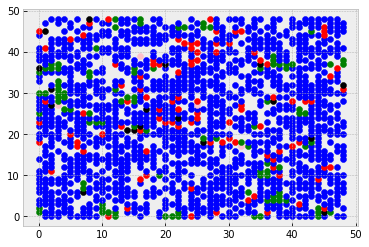

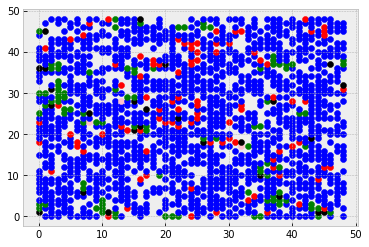

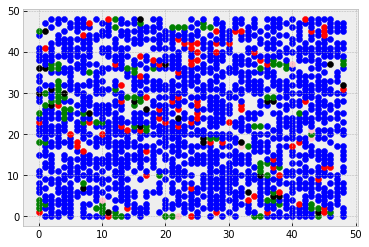

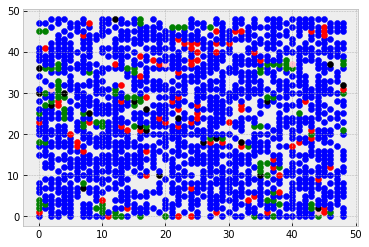

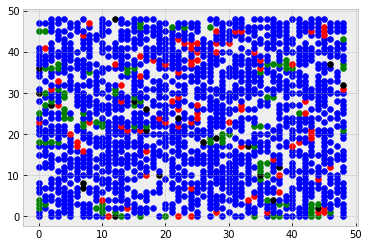

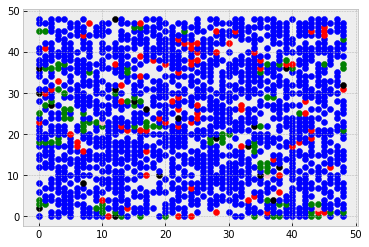

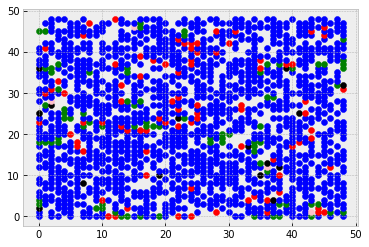

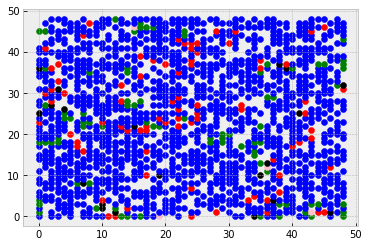

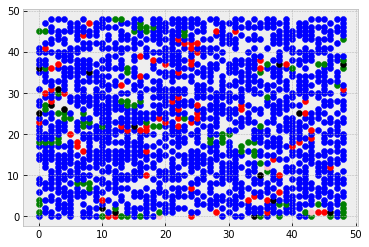

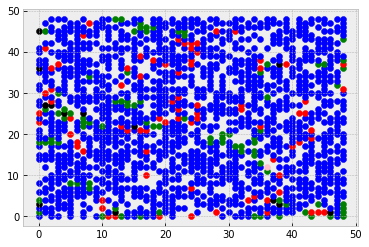

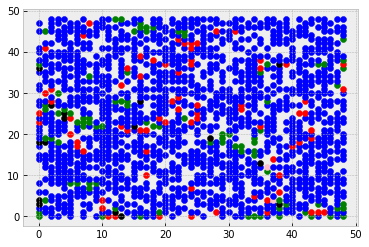

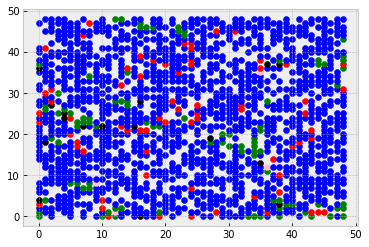

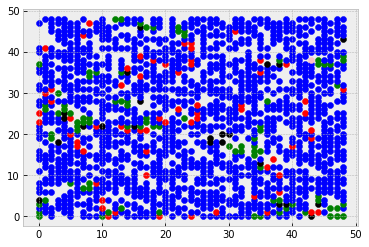

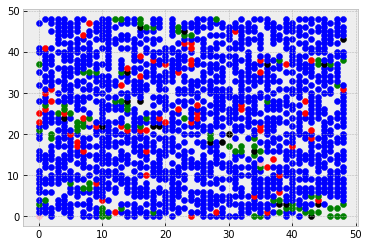

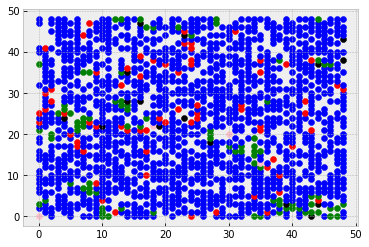

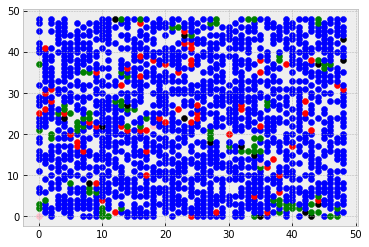

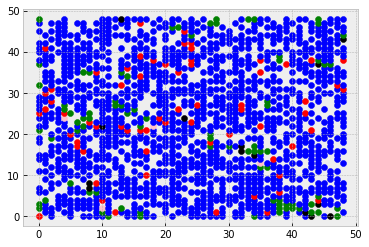

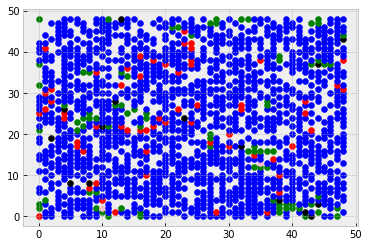

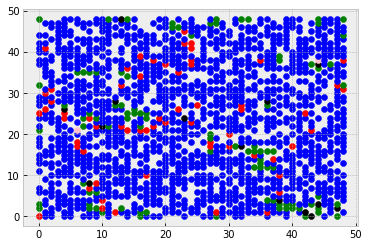

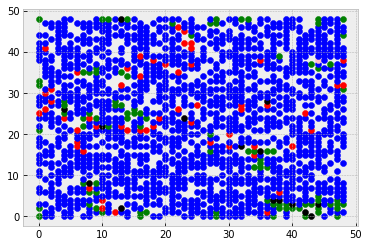

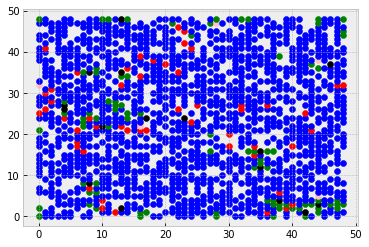

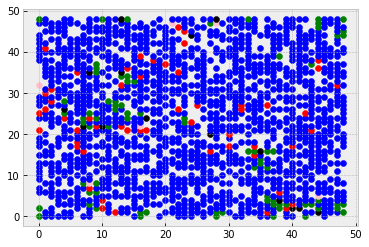

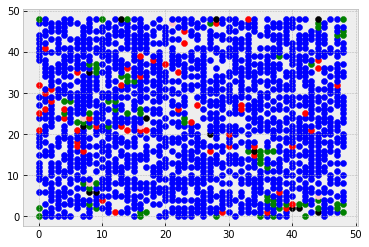

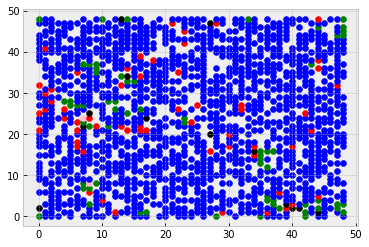

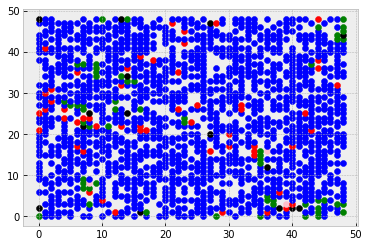

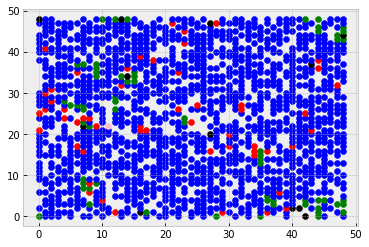

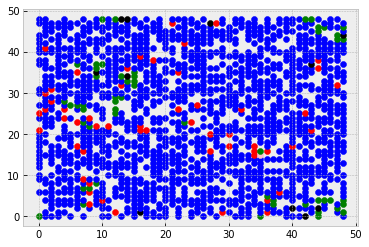

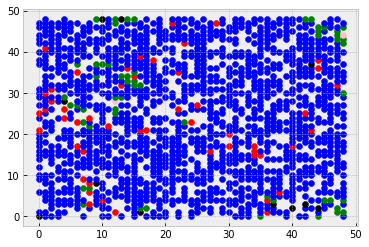

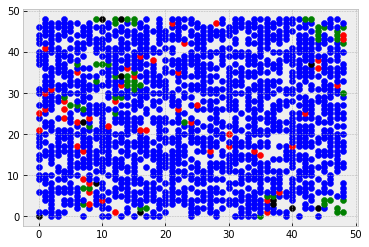

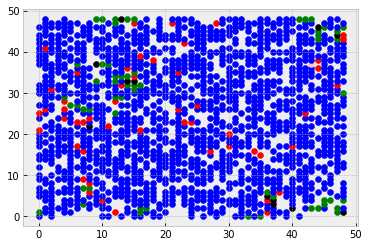

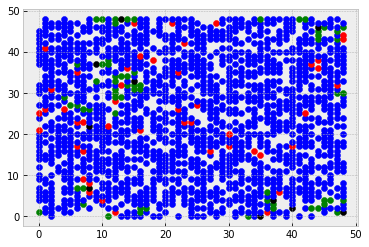

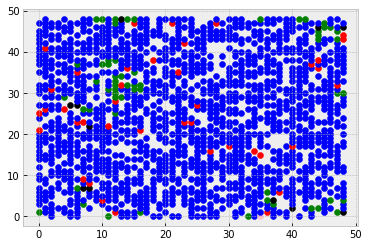

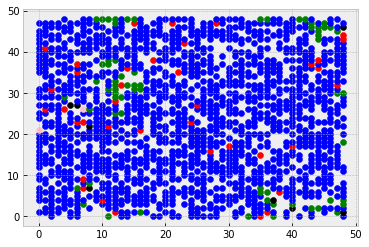

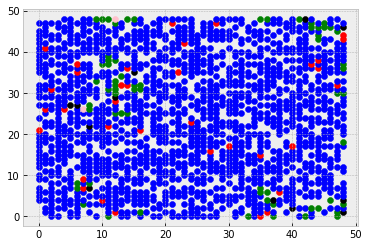

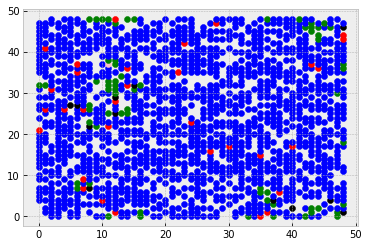

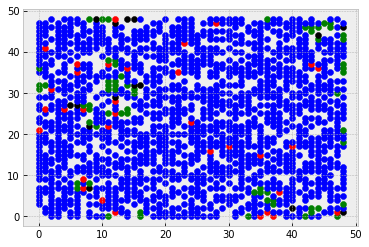

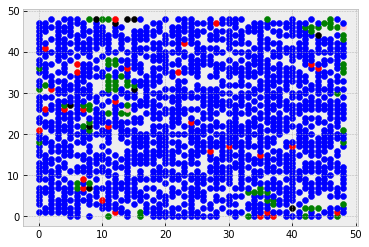

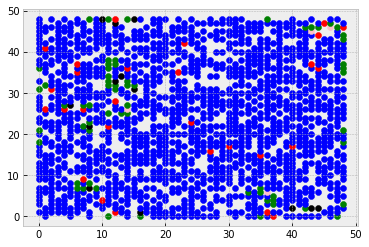

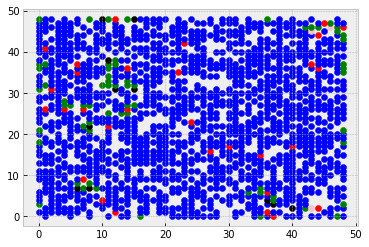

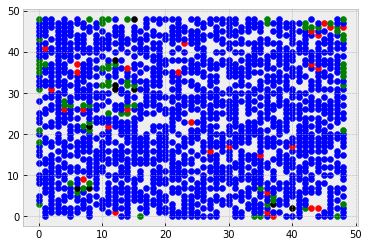

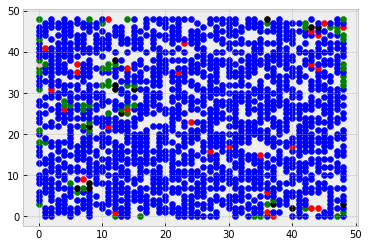

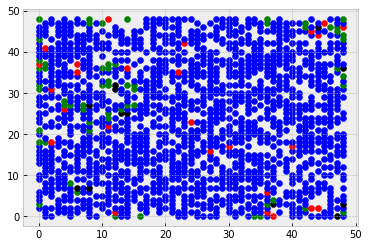

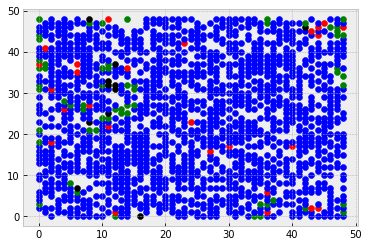

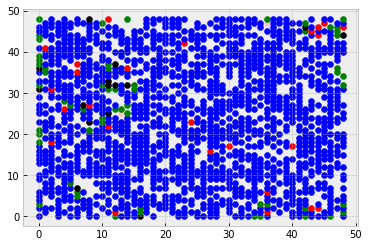

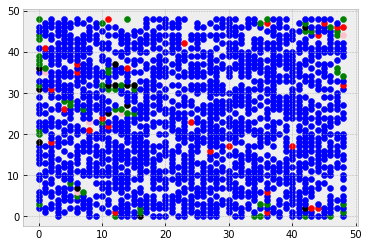

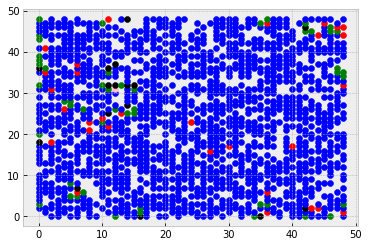

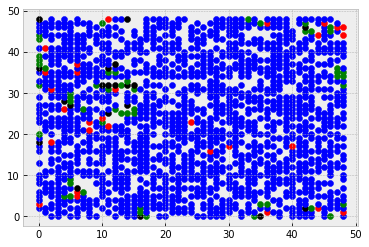

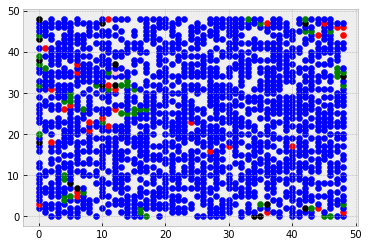

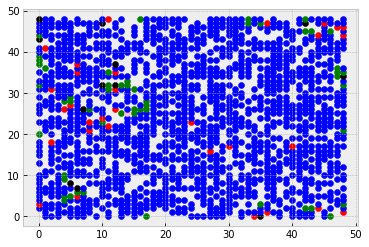

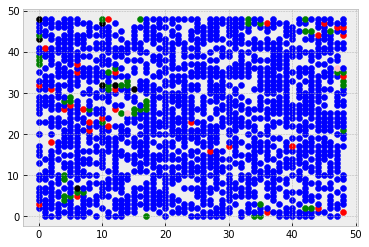

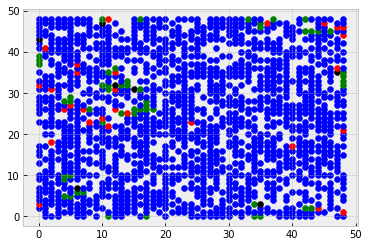

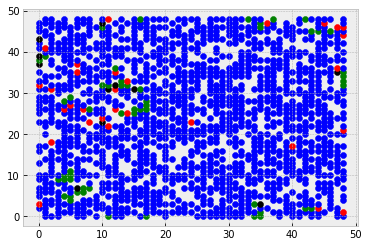

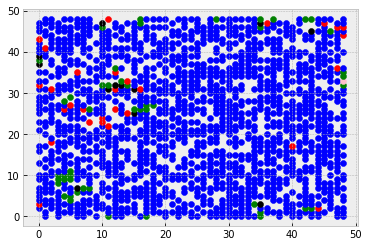

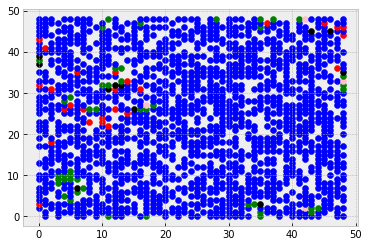

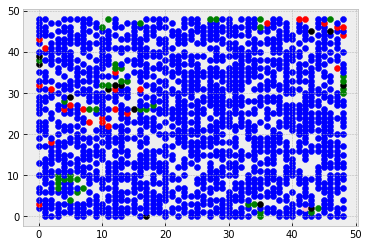

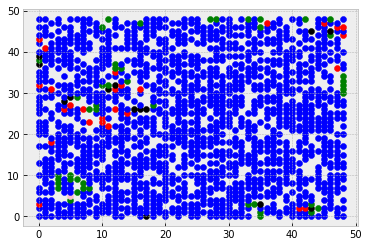

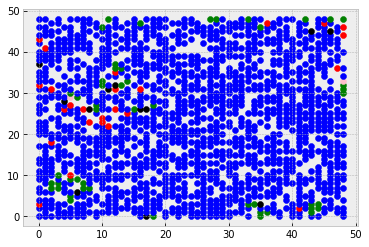

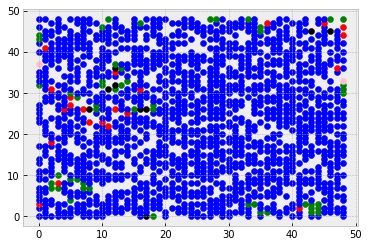

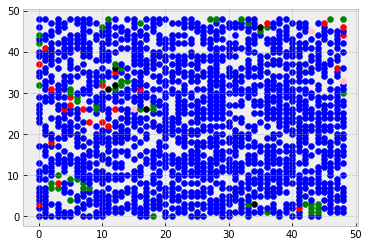

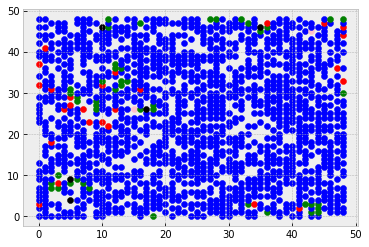

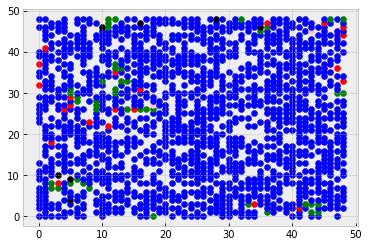

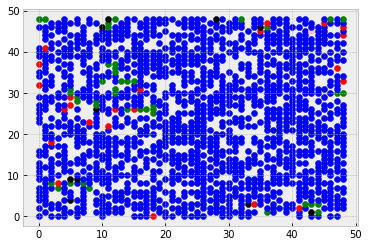

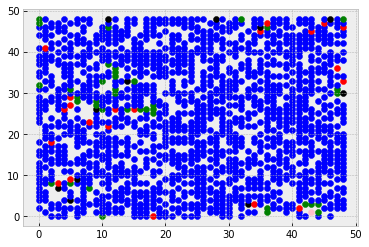

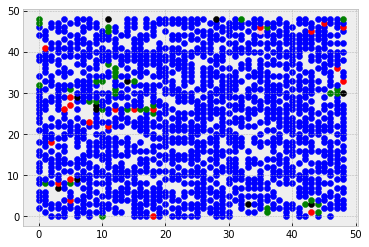

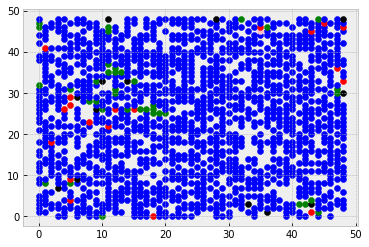

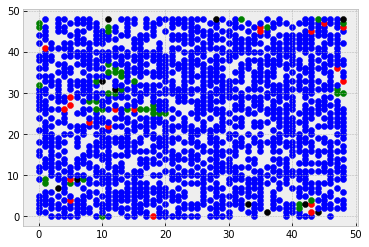

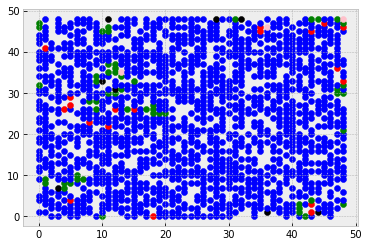

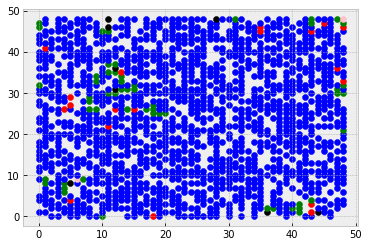

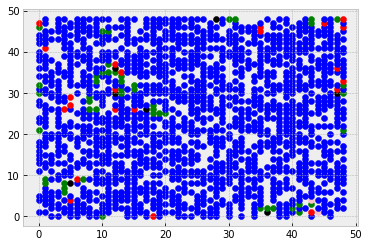

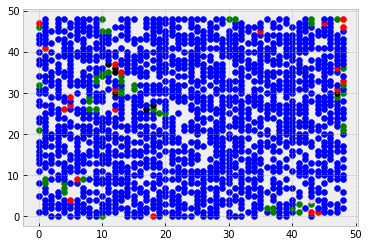

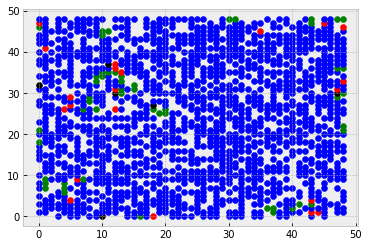

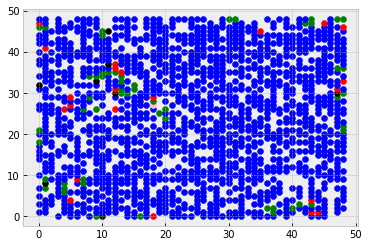

<Figure size 432x288 with 0 Axes>

In [17]:
T = 0
x = Lattice()
x.loadLattice()
while(T <= 100):
  T += 1
  
  x.apply_parity_rule()


In [ ]:
print(x.listNATURALDEATH)

[16, 10, 7, 15, 23, 11, 12, 18, 13, 22, 14, 27, 16, 24, 14, 12, 15, 14, 20, 20, 22, 15, 14, 24, 16, 11, 25, 13, 25, 16, 23, 21, 32, 20, 18, 12, 17, 23, 25, 15, 18, 15, 15, 21, 19, 25, 17, 26, 25, 23, 15, 19, 13, 21, 23, 10, 17, 26, 14, 25, 25, 19, 12, 16, 19, 20, 22, 21, 21, 20, 13, 31, 15, 20, 19, 17, 15, 23, 21, 24, 17, 17, 17, 26, 20, 15, 21, 23, 22, 25, 16, 14, 23, 18, 14, 20, 15, 20, 17, 18, 30]


In [ ]:
print(x.listLIVE)

[1200, 1286, 1373, 1454, 1537, 1599, 1654, 1707, 1745, 1766, 1790, 1825, 1821, 1825, 1824, 1842, 1866, 1875, 1881, 1882, 1885, 1862, 1874, 1886, 1883, 1902, 1915, 1927, 1927, 1934, 1917, 1931, 1930, 1897, 1916, 1917, 1925, 1915, 1920, 1914, 1945, 1940, 1950, 1953, 1947, 1936, 1917, 1917, 1894, 1886, 1892, 1893, 1906, 1919, 1926, 1914, 1937, 1936, 1934, 1946, 1936, 1924, 1921, 1922, 1924, 1922, 1919, 1920, 1929, 1928, 1924, 1917, 1903, 1911, 1910, 1908, 1907, 1909, 1901, 1906, 1923, 1926, 1929, 1943, 1934, 1923, 1928, 1935, 1920, 1917, 1910, 1916, 1923, 1907, 1905, 1909, 1914, 1914, 1912, 1923, 1920]


In [ ]:
print(x.listILL)

[289, 151, 85, 40, 27, 215, 209, 194, 197, 157, 153, 228, 207, 227, 228, 220, 214, 248, 235, 249, 267, 230, 256, 279, 249, 245, 279, 246, 252, 252, 256, 264, 283, 271, 223, 228, 246, 252, 282, 268, 230, 255, 257, 260, 267, 276, 253, 248, 258, 245, 243, 261, 245, 284, 244, 234, 253, 263, 255, 257, 254, 231, 243, 258, 254, 280, 280, 277, 252, 261, 253, 244, 243, 240, 256, 271, 250, 244, 246, 231, 260, 296, 276, 257, 266, 240, 243, 244, 242, 245, 234, 235, 242, 241, 259, 246, 241, 237, 262, 254, 265]


In [ ]:
print(x.listDEATHINF)

[39, 15, 6, 5, 4, 14, 26, 17, 24, 19, 20, 23, 31, 20, 28, 23, 19, 20, 26, 25, 26, 37, 40, 25, 27, 26, 28, 26, 33, 33, 23, 24, 25, 35, 40, 19, 23, 24, 30, 24, 18, 32, 14, 32, 27, 35, 28, 25, 23, 25, 22, 27, 40, 32, 17, 27, 26, 27, 32, 24, 42, 29, 33, 35, 32, 26, 30, 28, 29, 29, 28, 23, 27, 25, 45, 26, 35, 24, 27, 30, 35, 26, 29, 33, 35, 26, 22, 31, 27, 24, 32, 21, 30, 30, 31, 32, 33, 33, 32, 35, 26]


In [ ]:
print(x.listINCUBATION)

[393, 597, 755, 866, 983, 895, 971, 1029, 1056, 1108, 1154, 1106, 1118, 1183, 1185, 1188, 1225, 1232, 1225, 1263, 1242, 1242, 1257, 1280, 1279, 1266, 1275, 1261, 1264, 1294, 1278, 1261, 1253, 1257, 1250, 1264, 1280, 1262, 1245, 1274, 1291, 1305, 1300, 1299, 1289, 1281, 1282, 1271, 1312, 1281, 1316, 1275, 1289, 1296, 1262, 1243, 1320, 1316, 1294, 1293, 1275, 1245, 1252, 1245, 1231, 1239, 1255, 1232, 1241, 1237, 1280, 1293, 1254, 1274, 1277, 1244, 1233, 1280, 1232, 1290, 1288, 1255, 1223, 1266, 1248, 1255, 1250, 1228, 1218, 1268, 1258, 1247, 1248, 1187, 1219, 1240, 1264, 1253, 1232, 1207, 1222]


In [ ]:
print(x.listSupce)

[428, 387, 365, 329, 289, 251, 217, 175, 175, 140, 136, 159, 153, 124, 114, 115, 110, 94, 96, 100, 94, 89, 117, 97, 96, 94, 93, 95, 99, 95, 80, 83, 69, 86, 87, 83, 66, 83, 87, 86, 91, 102, 74, 83, 83, 87, 86, 81, 83, 82, 77, 78, 94, 85, 76, 84, 77, 83, 88, 82, 98, 94, 83, 90, 102, 101, 83, 79, 85, 96, 74, 83, 92, 91, 105, 97, 95, 84, 88, 76, 96, 87, 97, 106, 109, 107, 90, 109, 101, 92, 107, 88, 104, 110, 97, 89, 93, 106, 102, 100, 83]


In [ ]:
print(x.listHeal)

[435, 410, 384, 339, 321, 301, 256, 239, 205, 191, 164, 182, 160, 169, 134, 104, 110, 102, 107, 100, 115, 87, 78, 77, 62, 79, 84, 77, 74, 95, 81, 87, 124, 80, 89, 83, 91, 81, 88, 79, 101, 97, 90, 93, 95, 93, 74, 96, 92, 86, 101, 85, 89, 88, 98, 75, 92, 100, 92, 115, 106, 96, 76, 76, 84, 80, 81, 85, 84, 91, 85, 105, 83, 88, 95, 92, 77, 89, 92, 88, 108, 87, 84, 97, 93, 79, 89, 107, 91, 86, 83, 92, 109, 96, 94, 98, 95, 98, 90, 97, 105]


In [ ]:
print(x.listBIRTH)

[132, 116, 98, 104, 88, 91, 81, 71, 58, 74, 64, 51, 60, 61, 59, 53, 51, 44, 48, 49, 36, 50, 51, 42, 50, 54, 52, 38, 48, 43, 55, 48, 47, 60, 47, 48, 45, 52, 45, 69, 41, 57, 45, 40, 46, 42, 39, 38, 55, 53, 50, 55, 56, 52, 48, 57, 42, 52, 51, 46, 43, 47, 41, 44, 43, 48, 46, 54, 41, 46, 36, 49, 47, 45, 50, 41, 42, 45, 52, 60, 51, 46, 53, 37, 40, 46, 56, 44, 47, 39, 52, 52, 44, 47, 50, 51, 40, 43, 50, 46, 42]


findfont: Font family ['Cambria Math'] not found. Falling back to DejaVu Sans.


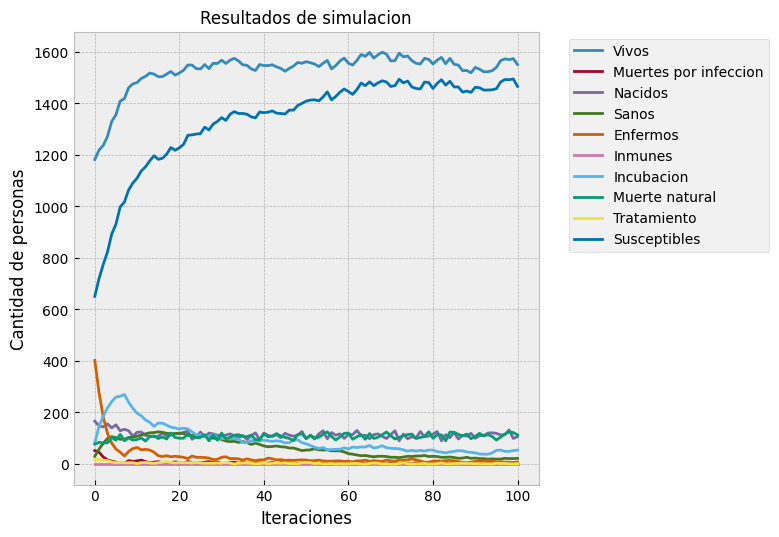

In [18]:


plt.figure(figsize=(600/100, 600/100), dpi=100)
plt.plot([i for i in range(0,len(x.listLIVE))],x.listLIVE,label='Vivos')
plt.plot([i for i in range(0,len(x.listDEATHINF))],x.listDEATHINF,label='Muertes por infeccion')
plt.plot([i for i in range(0,len(x.listBIRTH))],x.listBIRTH,label='Nacidos')
plt.plot([i for i in range(0,len(x.listHeal))],x.listHeal,label='Sanos')
plt.plot([i for i in range(0,len(x.listILL))],x.listILL,label='Enfermos')
plt.plot([i for i in range(0,len(x.listIMM))],x.listIMM,label='Inmunes')
plt.plot([i for i in range(0,len(x.listINCUBATION))],x.listINCUBATION,label='Incubacion')
plt.plot([i for i in range(0,len(x.listNATURALDEATH))],x.listNATURALDEATH,label='Muerte natural')
plt.plot([i for i in range(0,len(x.listTraet))],x.listTraet,label='Tratamiento')
plt.plot([i for i in range(0,len(x.listSupce))],x.listSupce,label='Susceptibles')
plt.title("Resultados de simulacion", 
          fontdict={'family': 'Cambria Math', 
                    'color' : 'black',
                    'size': 12})
plt.xlabel("Iteraciones", size = 12,family='Cambria Math')
plt.ylabel("Cantidad de personas", size = 12,family='Cambria Math')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


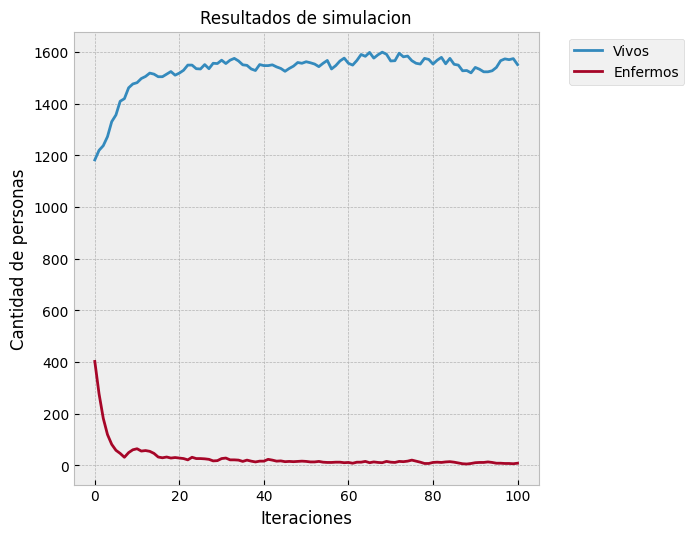

In [19]:
plt.figure(figsize=(600/100, 600/100), dpi=100)
plt.plot([i for i in range(0,len(x.listLIVE))],x.listLIVE,label='Vivos')
plt.plot([i for i in range(0,len(x.listILL))],x.listILL,label='Enfermos')
plt.title("Resultados de simulacion", 
          fontdict={'family': 'Cambria Math', 
                    'color' : 'black',
                    'size': 12})
plt.xlabel("Iteraciones", size = 12,family='Cambria Math')
plt.ylabel("Cantidad de personas", size = 12,family='Cambria Math')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
x.list

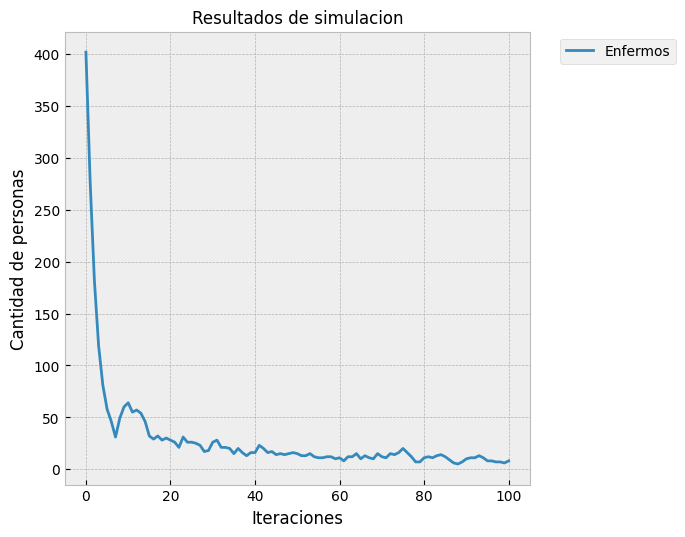

In [20]:
plt.figure(figsize=(600/100, 600/100), dpi=100)
plt.plot([i for i in range(0,len(x.listILL))],x.listILL,label='Enfermos')
plt.title("Resultados de simulacion", 
          fontdict={'family': 'Cambria Math', 
                    'color' : 'black',
                    'size': 12})
plt.xlabel("Iteraciones", size = 12,family='Cambria Math')
plt.ylabel("Cantidad de personas", size = 12,family='Cambria Math')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

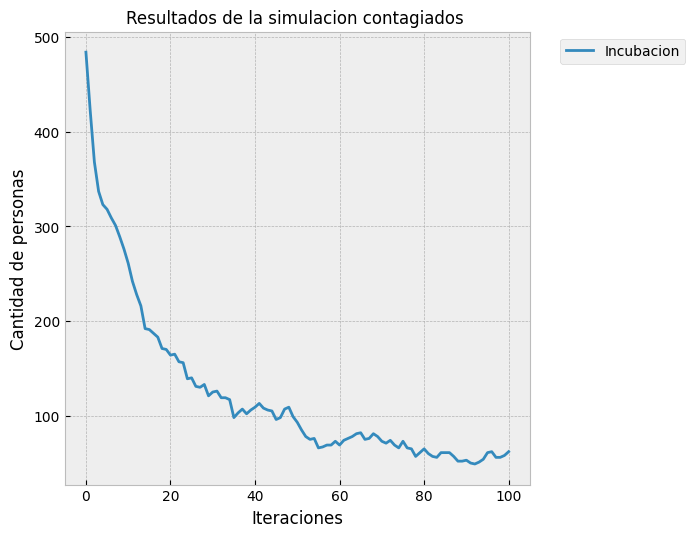

In [23]:
plt.figure(figsize=(600/100, 600/100), dpi=100)

i = 0
j = 0
contagiados = []
while(True):
  h = 0
  k = 0
  if(i>= len(x.listINCUBATION)):
    h = 0
  if(j>= len(x.listINCUBATION)):
    k = 0
  else:
   h = x.listINCUBATION[i] 
   k = x.listILL[j]
  contagiados.append(h + k)
  i+=1
  j+=1
  if(i>= len(x.listINCUBATION)) and (j>= len(x.listINCUBATION)):
    break


plt.plot([i for i in range(0,len(contagiados))],contagiados,label='Incubacion')
plt.title("Resultados de la simulacion contagiados ", 
          fontdict={'family': 'Cambria Math', 
                    'color' : 'black',
                    'size': 12})
plt.xlabel("Iteraciones", size = 12,family='Cambria Math')
plt.ylabel("Cantidad de personas", size = 12,family='Cambria Math')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

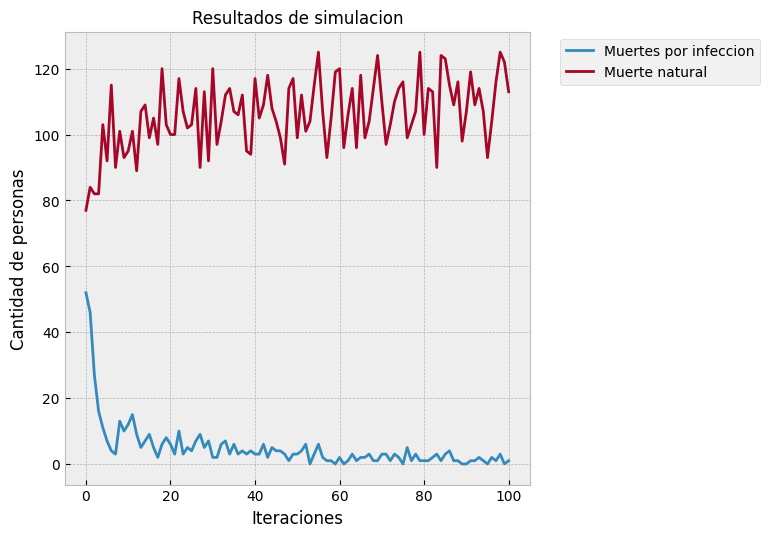

In [24]:
plt.figure(figsize=(600/100, 600/100), dpi=100)
plt.plot([i for i in range(0,len(x.listDEATHINF))],x.listDEATHINF,label='Muertes por infeccion')
plt.plot([i for i in range(0,len(x.listNATURALDEATH))],x.listNATURALDEATH,label='Muerte natural')
plt.title("Resultados de simulacion", 
          fontdict={'family': 'Cambria Math', 
                    'color' : 'black',
                    'size': 12})
plt.xlabel("Iteraciones", size = 12,family='Cambria Math')
plt.ylabel("Cantidad de personas", size = 12,family='Cambria Math')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

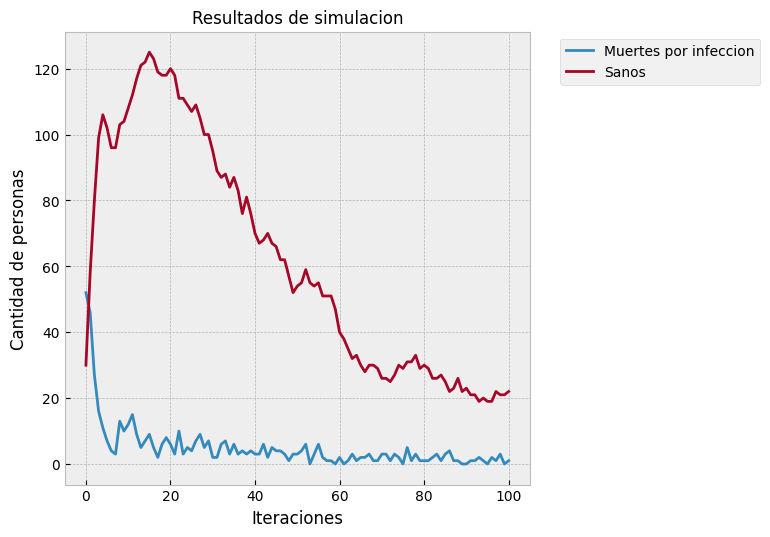

In [26]:
plt.figure(figsize=(600/100, 600/100), dpi=100)
plt.plot([i for i in range(0,len(x.listDEATHINF))],x.listDEATHINF,label='Muertes por infeccion')
plt.plot([i for i in range(0,len(x.listHeal))],x.listHeal,label='Sanos')
plt.title("Resultados de simulacion", 
          fontdict={'family': 'Cambria Math', 
                    'color' : 'black',
                    'size': 12})
plt.xlabel("Iteraciones", size = 12,family='Cambria Math')
plt.ylabel("Cantidad de personas", size = 12,family='Cambria Math')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()